In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

In [10]:
import matplotlib.pyplot as plt

In [18]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Hyper-parameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001


In [4]:
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.21MB/s]


In [8]:
train_dataset.data.shape, test_dataset.data.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

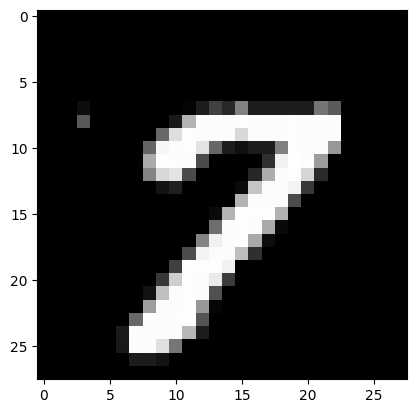

In [16]:
plt.imshow(train_dataset.data[753], cmap='gray')

In [15]:
train_dataset.data[753]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [17]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [19]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [20]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [21]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


0 23
1 45
2 2435
3 34
4 234
5 5
6 23


In [30]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Loss
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.4568
Epoch [1/5], Step [200/600], Loss: 0.2925
Epoch [1/5], Step [300/600], Loss: 0.2302
Epoch [1/5], Step [400/600], Loss: 0.1203
Epoch [1/5], Step [500/600], Loss: 0.1553
Epoch [1/5], Step [600/600], Loss: 0.1996
Epoch [2/5], Step [100/600], Loss: 0.1332
Epoch [2/5], Step [200/600], Loss: 0.0590
Epoch [2/5], Step [300/600], Loss: 0.0628
Epoch [2/5], Step [400/600], Loss: 0.1342
Epoch [2/5], Step [500/600], Loss: 0.0853
Epoch [2/5], Step [600/600], Loss: 0.0295
Epoch [3/5], Step [100/600], Loss: 0.0867
Epoch [3/5], Step [200/600], Loss: 0.0594
Epoch [3/5], Step [300/600], Loss: 0.0779
Epoch [3/5], Step [400/600], Loss: 0.0979
Epoch [3/5], Step [500/600], Loss: 0.1512
Epoch [3/5], Step [600/600], Loss: 0.1258
Epoch [4/5], Step [100/600], Loss: 0.0688
Epoch [4/5], Step [200/600], Loss: 0.0540
Epoch [4/5], Step [300/600], Loss: 0.0229
Epoch [4/5], Step [400/600], Loss: 0.1022
Epoch [4/5], Step [500/600], Loss: 0.0277
Epoch [4/5], Step [600/600], Loss:

In [31]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:

        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 97.86 %
